# Quantum Building Blocks
<hr></hr>

In order to understand some of the most relevant quantum protocols and algorithms, we must first introduce a few very important and prevalent quantum circuits, which serve as building blocks in the more advanced quantum routines. These include primitives such as: the preparation of important types of entangled states, namely [Bell states](https://en.wikipedia.org/wiki/Bell_state), [GHZ states](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state), and [W states](https://en.wikipedia.org/wiki/Hadamard_transform#Hadamard_transform_in_quantum_algorithms); the [Quantum Hadamard transform](https://en.wikipedia.org/wiki/Hadamard_transform); and [Phase kickback](https://en.wikipedia.org/wiki/Phase_kickback). 

We will also discuss some interesting routines such as the [Hadamard test](https://en.wikipedia.org/wiki/Hadamard_test) and the [Swap test](https://en.wikipedia.org/wiki/Swap_test), which relate to the computation of certain system properties in the form of the expectation values (i.e., averages) of repeated measurements. 

Other more advanced primitives, like the [Quantum Fourier Transform](https://en.wikipedia.org/wiki/Quantum_Fourier_transform), will be discussed in a separate chapter since they are more involved, requiring a longer description.

## 1. Preparation of (Some) Entangled States

### 1.1 Bell States

The Bell states correspond to an important set of 2-qubit entangled states utilized in many quantum protocols such as [quantum teleportation](https://en.wikipedia.org/wiki/Quantum_teleportation) and [superdense coding](https://en.wikipedia.org/wiki/Superdense_coding). 

There are four Bell states, which correspond to equal superposition statevectors that, in the computational basis $\{|0\rangle, |1\rangle\}^{\otimes 2}$, are given by:

$$
\begin{aligned}
|\Phi^+ \rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle \right), \quad \quad 
|\Phi^- \rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle \right), 
\\
\\
|\Psi^+ \rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle \right), \quad \quad 
|\Psi^- \rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle \right).
\end{aligned}
$$

These states can be generated by taking the four computational basis states $|00\rangle, |01\rangle, |10\rangle, |11\rangle $, and evolving them through the following quantum circuit:

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator

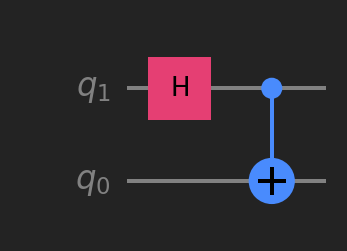

In [2]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw()

We can see the correspondence between each computational basis state, and the respective Bell state below:

In [3]:
q00 = Statevector.from_label('00') # Comp. basis state |00⟩
q01 = Statevector.from_label('01') # Comp. basis state |01⟩
q10 = Statevector.from_label('10') # Comp. basis state |10⟩
q11 = Statevector.from_label('11') # Comp. basis state |11⟩

Φp = q00.evolve(qc)                # Bell basis state |Φ⁺⟩
Ψp = q01.evolve(qc)                # Bell basis state |Ψ⁺⟩
Φm = q10.evolve(qc)                # Bell basis state |Φ⁻⟩
Ψm = q11.evolve(qc)                # Bell basis state |Ψ⁻⟩

In [4]:
print(f'state |00⟩ evolves to state: ')
display(Φp.draw('latex',prefix='|\\Phi^+ \\rangle = '))

print(f'state |01⟩ evolves to state: ')
display(Ψp.draw('latex',prefix='|\\Psi^+ \\rangle = '))

print(f'state |10⟩ evolves to state: ')
display(Φm.draw('latex',prefix='|\\Phi^- \\rangle = '))

print(f'state |11⟩ evolves to state: ')
display(Ψm.draw('latex',prefix='|\\Psi^- \\rangle = '))

state |00⟩ evolves to state: 


<IPython.core.display.Latex object>

state |01⟩ evolves to state: 


<IPython.core.display.Latex object>

state |10⟩ evolves to state: 


<IPython.core.display.Latex object>

state |11⟩ evolves to state: 


<IPython.core.display.Latex object>

We can also prepare these four states by using the same circuit shown above, where we initialize the input state as $|00\rangle$, and apply the following gates accordingly:

1. Apply no other gates to generate $|\Phi^+\rangle$.
2. Apply a $Z$ gate to either of the qubits to generate $|\Phi^-\rangle$.
3. Apply an $X$ gate to either of the qubits to generate $|\Psi^+\rangle$.
4. Apply both a $Z$ and an $X$ gate to either of the qubits to generate $|\Psi^-\rangle$.

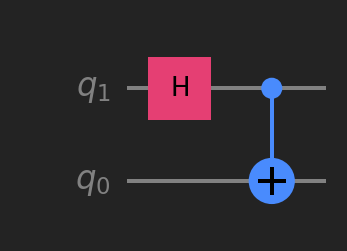

<IPython.core.display.Latex object>

In [5]:
# Circuit for |Φ⁺⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Phi^+ \\rangle = ')

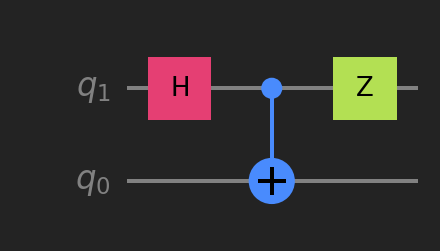

<IPython.core.display.Latex object>

In [6]:
# Circuit for |Φ⁻⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.z(1)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Phi^- \\rangle = ')

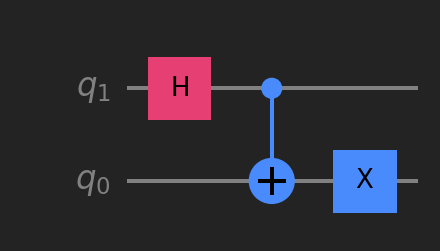

<IPython.core.display.Latex object>

In [7]:
# Circuit for |Ψ⁺⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.x(0)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Psi^+ \\rangle = ')

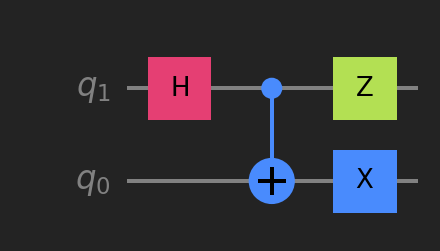

<IPython.core.display.Latex object>

In [8]:
# Circuit for |Ψ⁻⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.x(0)
qc.z(1)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Psi^- \\rangle = ')

### 1.2 GHZ States

Greenberger–Horne–Zeilinger (GHZ) states are a generalization of the $|\Phi^+ \rangle$ Bell state for 3 or more qubits. In other words, these are equal superpositions composed of the all-zeros and all-ones states. For example, for the specific case of 3 qubits, this state is given by:

$$ |\Omega\rangle = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle \right) .$$

But, more generally, for $n$ qubits:

$$ |\Omega_n\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n} \right) .$$

GHZ states are of critical importance in the generalized versions of superdense coding and quantum teleportation, and play a crucial role in the implementation of [quantum error correction](https://en.wikipedia.org/wiki/Quantum_error_correction).

There are several ways in which these states can be created using a quantum circuits. The simplest, and perhaps most intuitive, way is by placing one of the qubits in equal superposition, and then entangling the remaining qubits (initialized at $|0\rangle$) by using $CX$ gates as follows:

In [9]:
def ghz_cir_a(n):
    # create quantum circuit with n qubits
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(n-1)
    
    # apply cx gates between superposition qubit and remaning qubits
    for i in reversed(range(n-1)):
        qc_ghz.cx(n-1,i)
        
    return qc_ghz

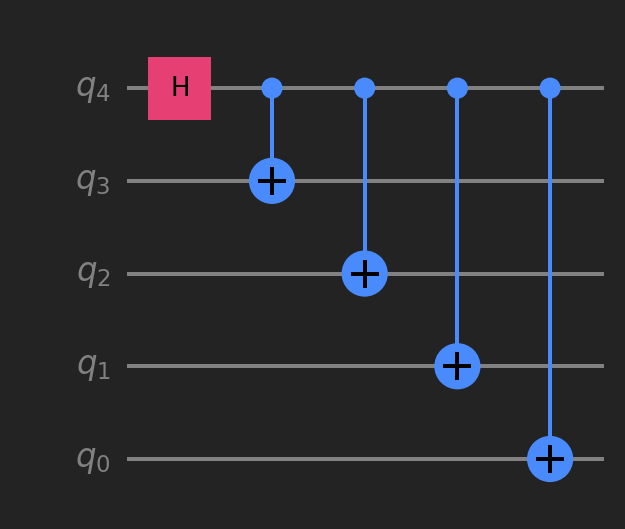

<IPython.core.display.Latex object>

In [10]:
# Create GHZ circuit for n qubits
n = 5
qc = ghz_cir_a(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

One of the issues with this circuit is that, in many quantum hardware architectures, not all qubits are physically connected to each other. Therefore, applying the $CX$ gates between non-adjacent qubits is not possible. For example, if a quantum chip only allows for "nearest neighbor" connectivity, qubit $q_4$ in the circuit below would only be directly connected to $q_3$, so it will require adding extra $\text{SWAP}$ gates to allow the entanglement between the remaining qubits. And of course, these extra gates add noise, which is not desirable. Alternatively, GHZ states can also be generated by gradually entangling each successive pair of qubits:

In [11]:
def ghz_cir_b(n):
    # create quantum circuit with n qubits
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(n-1)
    
    # apply cx gates between successive pairs of qubits
    for i in reversed(range(n-1)):
        qc_ghz.cx(i+1,i)
        
    return qc_ghz

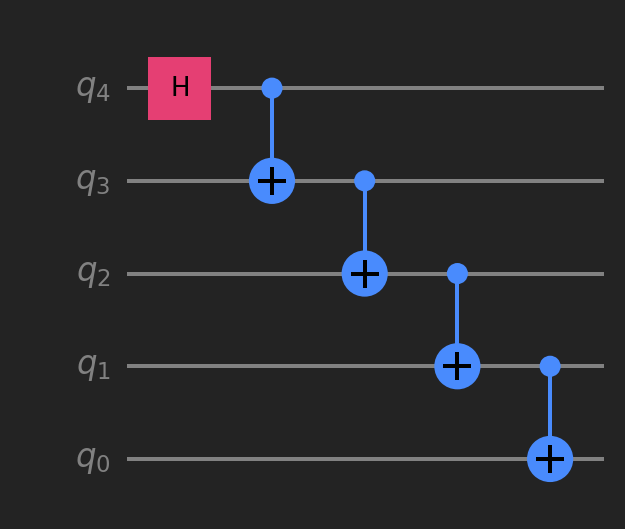

<IPython.core.display.Latex object>

In [12]:
# Create GHZ circuit for n qubits
n = 5
qc = ghz_cir_b(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

Now, the problem with this approach is that, since each $CX$ gate needs to be applied sequentially, the total circuit depth for $n$ qubits is equal to $n+1$. In other words, no $CX$ gates are being applied in parallel. This is problematic when the number of qubits is large because, the most significant qubits are being left idle for a long period of time, which leads to errors in the computation. 

It is therefore desirable to implement GHZ circuits where the nearest-neighbor connectivity is preserved, but the depth of the circuit is reduced. The example below cuts the depth to $n/2 + 2$, but there are more clever techniques where, for certain connectivity maps, the total number of $CX$ gates can be reduced to be order $\log_2(n)$.

In [13]:
def ghz_cir_c(n):
    # create quantum circuit with n qubits
    qb_mid = n//2
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(qb_mid)
    
    # apply cx gates between successive pairs of qubits
    for i in reversed(range(qb_mid)):
        qc_ghz.cx(i+1,i)
    
    for i in range(qb_mid,n-1):
        qc_ghz.cx(i,i+1)
    
    return qc_ghz

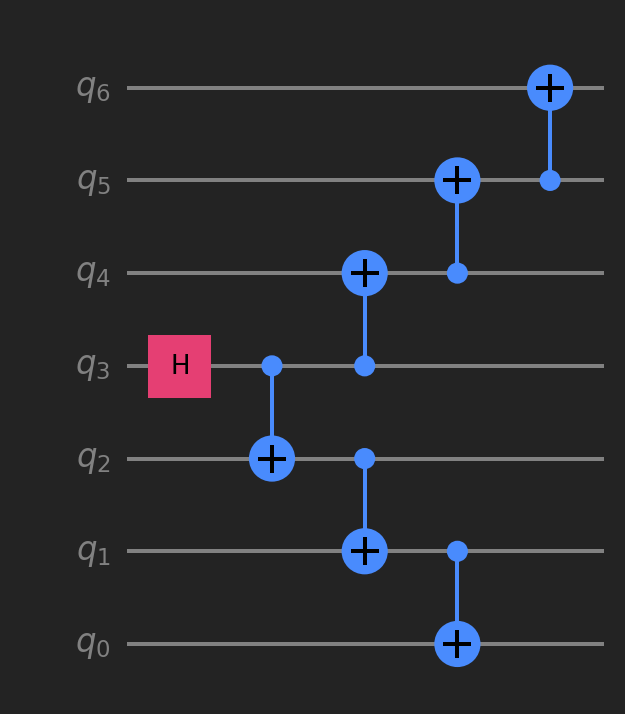

<IPython.core.display.Latex object>

In [14]:
# Create GHZ circuit for n qubits
n = 7
qc = ghz_cir_c(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

### 1.3 W States

Just like GHZ states can be seen as a generalization of the $|\Phi^+\rangle$ Bell state, W states can be considered to be a generalization of the $|\Psi^+\rangle$ Bell state for 3 or more qubits, where there is only one $1$ in each state that composes the superposition. So, for the particular case of 3 qubits we have:

$$ |\text{W}\rangle = \frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right) .$$

But, in general, for $n$ qubits:

$$ |\text{W}_n\rangle = \frac{1}{\sqrt{n}}\sum_{j=0}^{n-1} |2^j\rangle ,$$

where we use the integer $2^j$ inside the ket to denote the binary value for that particular number. So, for example, for $n = 5$, we have:

$$ 
\begin{aligned}
|\text{W}_5\rangle &= \frac{1}{\sqrt{5}}\left(|1\rangle + |2\rangle + |4\rangle + |8\rangle + |16\rangle \right) 
\\
\\
|\text{W}_5\rangle &= \frac{1}{\sqrt{5}}\left(|00001\rangle + |00010\rangle + |00100\rangle + |01000\rangle + |10000\rangle \right) 
\end{aligned}
$$

W states play a critical role in quantum information theory, quantum communication, and other applications that require [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

The circuit to generate these states is significantly more involved than that of GHZ states, so I provide a detailed description on how to do this in a separate [post](https://nbviewer.org/github/diemilio/quantum-playground/blob/main/w-states/w-states.ipynb). However, for convenience, the code to generate these circuits is provided below.

In [15]:
def w_cir(n):
    
    prob_amp = np.sqrt(1/n)          # probability amplitude
    rot_ang = 2*np.arccos(prob_amp)  # initial rotation angle
    
    # create quantum circuit with n qubits
    qc_w = QuantumCircuit(n) 
    
    # probability redistribution
    qc_w.ry(rot_ang,n-1)
    for i in range(n-1,1,-1):
        comp_amp = np.sqrt(i/n)
        rot_ang = 2*np.arccos(prob_amp/(comp_amp))
        qc_w.cry(rot_ang,i,i-1)
    
    # state reshuffling
    for i in range(1, n):
        qc_w.cx(i,i-1)
    
    qc_w.x(n-1)
    
    return qc_w

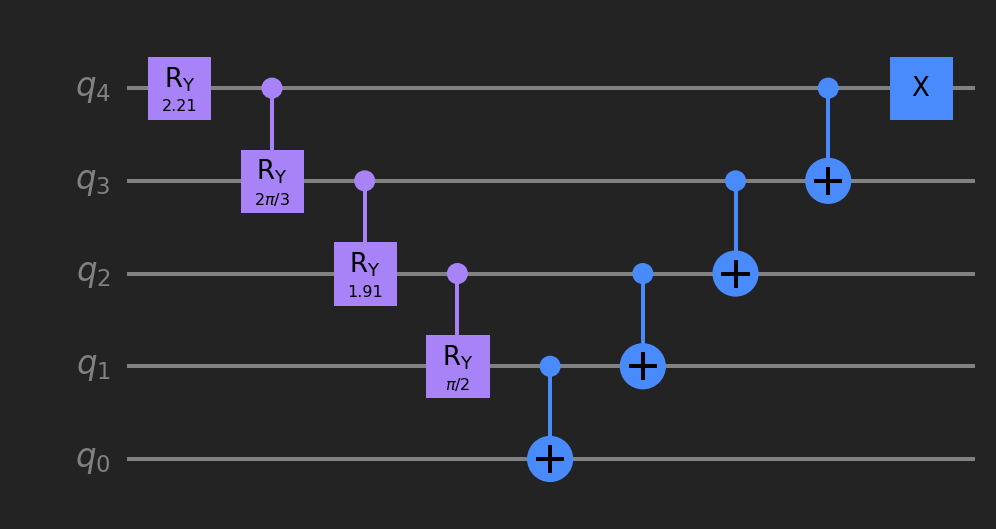

<IPython.core.display.Latex object>

In [16]:
# Create W circuit for n qubits
n = 5
qc = w_cir(n)
display(qc.draw())

# Display n-qubit W state
Statevector(qc).draw('latex', prefix=f'|\\text W_{n} \\rangle = ')

Similar to the preparation of GHZ states, there are also a methods to generate W states with circuit lower depths. [[Cruz18]](https://arxiv.org/pdf/1807.05572) provides some insight into how both GHZ and W state generation can be accomplished using circuits with number of gates in order $\log_2(n)$.

## 2. The Quantum Hadamard Transform



The quantum [Hadamard transform](https://en.wikipedia.org/wiki/Hadamard_transform) (QHT) is one of the most important building blocks in quantum computing as it is part of the majority of quantum algorithms. Its definition is rather simple, but the nomenclature used to describe how it acts on a general quantum state is worth introducing because it is used rather extensively.

The QHT is nothing other than the Hadamard gate $H$ being individually applied to $n$ qubits:

$$ \text{QHT}_n = H^{\otimes n} .$$

Recalling that the matrix for Hadamard operation is given by:

$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} ,$$

the QHT is then a matrix with $N = 2^n$ rows/columns, composed of alternating sequences of $1$s an $-1$s with a normalization factor, which is determined by the number of qubits. To see this, we can use the $2$-qubit case as an example:

$$ 
\begin{aligned}
\text{QHT}_2 &= H \otimes H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}
\\
\\
\text{QHT}_2 &= \frac{1}{\sqrt{4}} \begin{bmatrix} 1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  & \phantom{-}1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  \\ 1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  & -1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \end{bmatrix}
\\
\\
\text{QHT}_2 &= \frac{1}{\sqrt{4}} \begin{bmatrix} 1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1 \\
                                            1 & -1 & \phantom{-}1 & -1 \\
                                            1 & \phantom{-}1 & -1 & -1 \\
                                            1 & -1 & -1 & \phantom{-}1 \end{bmatrix} .
\end{aligned}
$$


In general, the QHT matrix is of the form:

$$ 
\text{QHT}_n = \frac{1}{\sqrt{N}} \begin{bmatrix} h_{0,0} & h_{0,1} & \dots & h_{0,(N-1)} \\
                                            h_{1,0} & h_{1,1} & \dots & h_{1,(N-1)} \\
                                            \vdots & \vdots  & \ddots & \vdots \\
                                            h_{(N-1),0} & h_{(N-1),1} & \dots & h_{(N-1),(N-1)} \end{bmatrix}
$$

where the element in row $i$ and column $j$ can be computed as:

$$ h_{i,j} = (-1)^{i \cdot j}. $$

Here, $i \cdot j$ represents the dot product of the binary representations of $i$ and $j$. So, for example, for $n = 3$ qubits, The QHT will be a matrix of size $2^3 \times 2^3 = 8 \times 8$. To calculate the matrix entry in, let's say, row $i = 2$ (which is $010$ in binary) and column $j = 6$ ($110$ in binary), we compute:

$$
\begin{aligned}
i \cdot j  &= 010 \cdot 110
\\
i \cdot j  &= 0 \times 1 + 1 \times 1 + 0 \times 0
\\
i \cdot j & = 1,
\end{aligned}
$$

which results in a value for the matrix element of:

$$h_{2,6} = (-1)^{1} = -1 .$$

We can also use Qiskit to implement the circuit and unitary matrix for the QHT as follows:

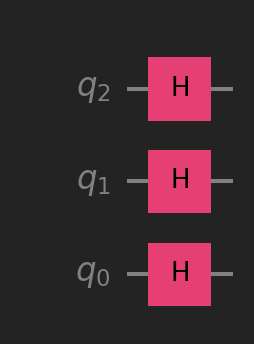

<IPython.core.display.Latex object>

In [17]:
# Create QHT circuit for n qubits
n = 3

qc = QuantumCircuit(n)
qc.h(range(n))
display(qc.draw())

# Display n-qubit QHT matrix
QHT = Operator(qc)
QHT.draw('latex', prefix=f'\\text Q \\text H \\text T_{n} = ')

An important expression that comes in handy when analyzing quantum algorithms is that of the output state $|y\rangle$ of the QHT given an arbitrary input state $|x\rangle$:

$$ |y\rangle = \text{QHT} |x\rangle .$$

An easy way to find how to calculate $|y\rangle$, is by first assuming $|x\rangle$ is one of the computational basis states $\{|0\rangle, |1\rangle \}^{\otimes n}$. For example, if $|x\rangle$ is the all-zeros state $|0 \dots 00\rangle$, then $|y\rangle$ will be a statevector whose inputs correspond to the first column of the QHT matrix; if $|x\rangle$ is state $|0 \dots 01\rangle$, then $|y\rangle$ will correspond to the QHT's second column, and so on. So, in general, if the input to the QHT is the $j^{\text{th}}$ basis state $|j\rangle$, the output state $|y_j\rangle$ corresponds to the $j^{\text{th}}$ column of the QHT matrix.

Again, if we take as example for $|x\rangle$ is the all-zeros state, we have:

$$ 
\begin{aligned}
|y_0\rangle &= \text{QHT} \, |0 \dots 00 \rangle
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \left( \; \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} + 
                                          \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix} + \dots +
                                          \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix} \; \right)
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} |i\rangle .
\end{aligned}
$$


Now, recalling that each matrix entry is given by $ h_{i,j} = (-1)^{i \cdot j} $, we find the expression for a given input $|x\rangle = |j\rangle$, to obtain the output $|y_j\rangle$, by using the expression we found above for $|y_0\rangle$, but also include the corresponding matrix entry coefficients in our summation:

$$ 
\begin{aligned}
|y_j\rangle &= \text{QHT} \, |j\rangle = \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} h_{i,j} |i\rangle
\\
\\
|y_j\rangle &= \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} (-1)^{i \cdot j} |i\rangle .
\end{aligned} 
$$

Finally, to obtain the general equation for an arbitrary input $|x\rangle$, all we need to recall is that, any state can be expressed as a linear superposition of the computational basis states:

$$|x\rangle = \sum_{j=0}^{N-1} \alpha_j |j\rangle .$$

So, by linearity:

$$ 
\begin{aligned}
|y\rangle &= \text{QHT} \, |x\rangle = \sum_{j=0}^{N-1} \alpha_j \, \text{QHT} \, |j\rangle 
\\
\\
|y\rangle &= \sum_{j=0}^{N-1} \alpha_j |y_j\rangle, 
\end{aligned}
$$

which, after replacing $|y_j\rangle$ with the expression we found above, results in:

$$ 
\begin{split}
\boxed{|y\rangle = \sum_{i = 0}^{N - 1} \left( \frac{1}{\sqrt{N}} \sum_{j = 0}^{N - 1} (-1)^{i \cdot j} \alpha_j \right) |i\rangle}
\end{split}
$$

The terms inside the parenthesis correspond to each of the probability amplitudes $\beta_i$ of the output state; i.e.:

$$ |y\rangle = \sum_{i=0}^{N-1} \beta_i |i\rangle, \quad \text{where:} \; \beta_i = \frac{1}{\sqrt{N}} \sum_{j = 0}^{N - 1} (-1)^{i \cdot j} \alpha_j .$$

Let's now use Qiskit to compute the QHT of a W state:

In [18]:
# Generate n-qubit W state
n = 3
QHT = Operator.from_label('H'*n)
W = Statevector(w_cir(n))
W.draw('latex', prefix=f'|\\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

In [19]:
# Compute QHT of W state using Qiskit
y = W.evolve(QHT)
y.draw('latex', prefix=f'\\text Q \\text H \\text T | \\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

Qiskit is very convinient; however, it is a good exercise to code a function to compute the QHT in order to verify that the expressions we derived above do indeed match what we get from Qiskit:

In [20]:
# Function that computes the QHT of an input Statevector sv
def qht_func(sv):
    
    βs = []                                       # List to store each βi                                    
    
    for i in range(len(sv)):
        i_str = np.binary_repr(i,n)               # Convert i to binary str
        i_lst = [int(bit,2) for bit in i_str]     # Store bits of i in a list
        
        β_temp = 0
        for j, α in enumerate(sv.data):
            j_str = np.binary_repr(j,n)           # Convert j to binary str
            j_lst = [int(bit,2) for bit in j_str] # Store bits of j in a list
            ij_dot = np.dot(i_lst,j_lst)          # perform inner product of i and j
            β_temp += (-1)**ij_dot * α            # sum over j
        
        β_temp *= 1/np.sqrt(2**n)                 # multiply βi by normalization factor
        βs.append(β_temp)
    
    return Statevector(βs)

In [21]:
# Computer QHT of W state using our own function (should match Qiskit's result)
y = qht_func(W)
y.draw('latex', prefix=f'\\text Q \\text H \\text T | \\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

## 3. Phase Kickback

Even though most popular descriptions of quantum computing cite **superposition** and **entanglement** as the key ingredients to achieving computational speedups, the reality is that the [phase kickback](https://en.wikipedia.org/wiki/Phase_kickback) effect is equally (if not more) important. Phase kickback is so critical that it shows up, in one way or an other, in every single quantum algorithm.

### 3.1 Eigenvalues and Eigenvectors

To understand phase kickback we need to talk about the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a matrix. This might sound a bit intimidating, but the good thing is that these concepts have a very intuitive geometrical interpretation when discussed in the context of a single qubit system. And from there, it should be easy to generalize them to multi-qubit systems.

Let's recall that single qubit gates, which are described by unitary matrices, can be viewed as qubit rotations in the Bloch sphere. For example, the $X$ gate rotates a qubit's Bloch vector by $180°$ about the $x$ axis. We can easily see this when the $X$ gate is applied to state $|0\rangle$:

Qubit before X gate is applied:


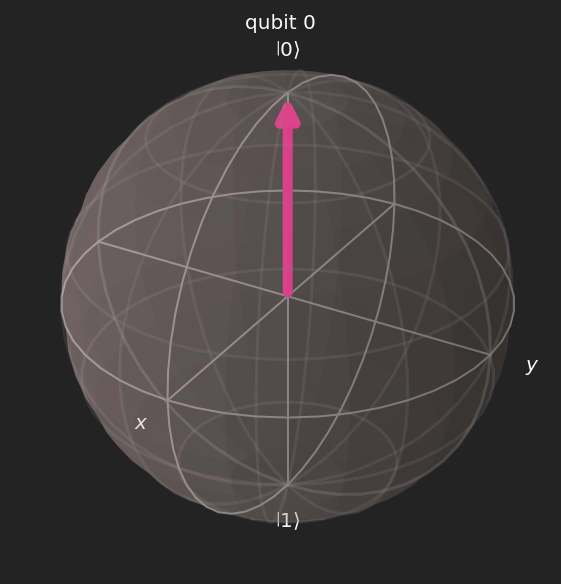

In [28]:
q = Statevector.from_label('0')
print('Qubit before X gate is applied:')
q.draw('bloch')

Qubit after X gate is applied:


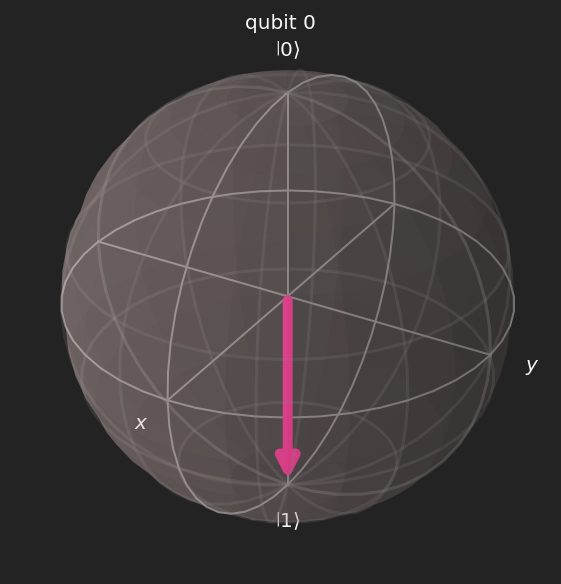

In [29]:
X = Operator.from_label('X')
q = q.evolve(X)
print('Qubit after X gate is applied:')
q.draw('bloch')

But what happens if we apply an $X$ gate to a qubit whose Bloch vector is pointing in a direction **parallel** to the $x$ axis? Intuition tells us that the qubit will rotate on itself, and therefore remain unchanged. That is indeed precisely what happens to the statevector $|+\rangle$:

Qubit before X gate is applied:


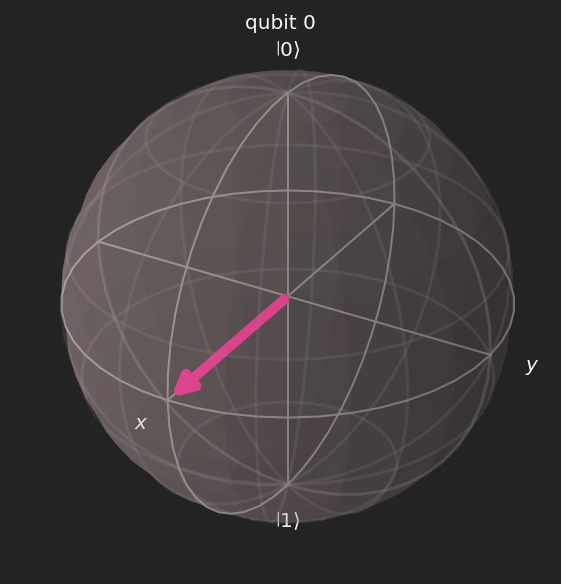

In [30]:
p = Statevector.from_label('+')
print('Qubit before X gate is applied:')
p.draw('bloch')

Qubit after X gate is applied:


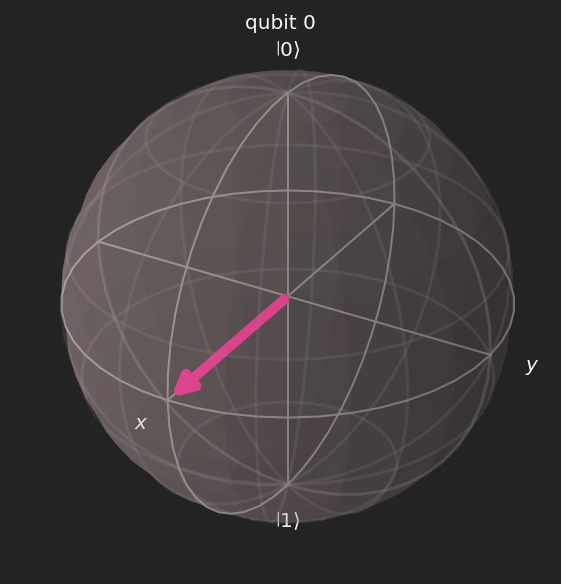

In [32]:
p = p.evolve(X)
print('Qubit after X gate is applied:')
p.draw('bloch')

We then say that state $|+\rangle$ is an eigenvector of the $X$ matrix. The other eigenvector of this matrix is state $|-\rangle$, since it is the only other vector that lies along the $x$ axis, and will therefore remain unchanged if an $X$ gate is applied. 

So, the <span style="color:#a883f7"><strong>eigenvectors</strong></span> of a unitary matrix $U$ are those special vectors whose direction remains unchanged when $U$ acts on them.

Eigenvectors then satisfy what is known as the <span style="color:#a883f7"><strong>eigenvalue equation</strong></span>. For a unitary $U$ with an eigenvector $|u\rangle$, the eigenvalue equation is given by:

$$ U|u\rangle = \lambda |u\rangle, $$

where $\lambda$ is the <span style="color:#a883f7"><strong>eigenvalue</strong></span> corresponding to the eigenvector $|u\rangle$.

In the case non-unitary matrices (like [spatial transformation matrices](https://en.wikipedia.org/wiki/Transformation_matrix)), $\lambda$ can be interpreted as the value by which an eigenvector gets scaled (stretched or compressed) by the matrix of interest while maintaining its direction. However, since unitary matrices do preserve the norm of vectors (i.e., statevectors evolved through unitaries remain normalized), $\lambda$ is always a complex number of modulus equal to $1$:

$$|\lambda| = 1 .$$

This explains why states $|+\rangle$ and $|-\rangle$ remain entirely unchanged when the $X$ matrix acts on them. However, since it is only the modulus of $\lambda$ that must be equal to $1$, there is no restriction on what its phase must be. As a matter of fact, this phase is determined to the unitary $U$ and the corresponding eigenvector $|u\rangle$. To see what we mean by this, let's use the eigenvalue equation on $X$ for both of it's corresponding eigenvectors. So, starting with eigenvector $|+\rangle$:

$$
\begin{aligned}
X |+\rangle &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
X |+\rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
X |+\rangle &= |+\rangle .
\end{aligned}
$$

From this, we can see that applying the $X$ gate to $|+\rangle$, results in exactly state $|+\rangle$, which means its corresponding eigenvalue is $\lambda_+ = 1 .$ Now let's look at state $|-\rangle$:

$$
\begin{aligned}
X |-\rangle &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
\\
X |-\rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix}
\\
\\
X |-\rangle &= -1 |-\rangle .
\end{aligned}
$$

Now, in this case, we get state $|-\rangle$ pre-multiplied by $-1$, which means that its eigenvalue is $\lambda_- = -1 .$ This is consistent with what we have described before because $\lambda_-$ does indeed have modulus equal to $1$. And, since every complex number $a + ib$, can also be expressed as $re^{i\varphi}$, we have that our eigenvalues can always be expressed as:

$$ \lambda = e^{i\varphi}, $$

which for our specific example then gives us: $\lambda_- = e^{i \pi} = -1 ,$ making the phase $\varphi_- = \pi$. 

So we say that, for the $X$ matrix, the eigenvector $|-\rangle$ has an eigenvalue that corresponds to a global phase of $\varphi_- = \pi$. More generally, we can rewrite the eigenvalue equation as:

$$ U|u\rangle = e^{i\varphi} |u\rangle. $$

Another simple example is the matrix for the $Z$ gate, which has states $|0\rangle$ and $|1\rangle$ as its eigenvectors since their direction remains unchanged when the $Z$ gate acts on them.